In [1]:
import xarray as xr
import numpy as np
import glob 
import os

In [5]:
def unpack_categories(file):

    # data_vars = ['aicen','vicen','vsnon']
    ncat = 5
    encd = {'aice01': {'_FillValue': None},
            'aice02': {'_FillValue': None},
            'aice03': {'_FillValue': None},
            'aice04': {'_FillValue': None},
            'aice05': {'_FillValue': None},
            'vice01': {'_FillValue': None},
            'vice02': {'_FillValue': None},
            'vice03': {'_FillValue': None},
            'vice04': {'_FillValue': None},
            'vice05': {'_FillValue': None},
            'vsno01': {'_FillValue': None},
            'vsno02': {'_FillValue': None},
            'vsno03': {'_FillValue': None},
            'vsno04': {'_FillValue': None},
            'vsno05': {'_FillValue': None}}

    ds = xr.open_dataset(file)
    os.rename(file, file+'~')
    # ds = ds[data_vars]

    for n in range(1,ncat+1):
        ds['aice'+'{:02}'.format(n)]=ds.aicen.isel(ncat=n-1)
        ds['vice'+'{:02}'.format(n)]=ds.vicen.isel(ncat=n-1)
        ds['vsno'+'{:02}'.format(n)]=ds.vsnon.isel(ncat=n-1)
        
    # ds=ds.drop(data_vars)

    ds.to_netcdf(file, encoding=encd)  
    
    return len(ds.variables)

def repack_categories(file):

    ncat = 5
    expanded_vars=[]
    for n in range(1,ncat+1):
        expanded_vars.append('vice'+'{:02}'.format(n))
        expanded_vars.append('aice'+'{:02}'.format(n))
        expanded_vars.append('vsno'+'{:02}'.format(n))

    encd = {'aicen': {'_FillValue': None},
            'vicen': {'_FillValue': None},
            'vsnon': {'_FillValue': None}}
            
    ds = xr.open_dataset(file)
    os.rename(file, file+'~')
    aicen=np.zeros((ncat,4))
    vicen=np.zeros((ncat,4))
    vsnon=np.zeros((ncat,4))
    
    for n in range(1,ncat+1):
        aicen[n-1,:]=ds['aice'+'{:02}'.format(n)].values
        vicen[n-1,:]=ds['vice'+'{:02}'.format(n)].values
        vsnon[n-1,:]=ds['vsno'+'{:02}'.format(n)].values
    
    ds['aicen']=xr.DataArray(data=aicen, dims=['ncat','ni'])
    ds['vicen']=xr.DataArray(data=vicen, dims=['ncat','ni'])
    ds['vsnon']=xr.DataArray(data=vsnon, dims=['ncat','ni'])

    ds=ds.drop(expanded_vars)
    ds.to_netcdf(file, mode= 'w', encoding=encd)

    os.remove(file+'~')

    return len(ds.variables)

In [3]:
file = 'cice.r.nc'

In [6]:
num1 = unpack_categories(file)
num2 = repack_categories(file)

print(num1)
print(num2)

70
55


In [5]:
unpack_categories(file)

In [7]:
repack_categories('cice.r.nc')

['vice01', 'aice01', 'vsno01', 'vice02', 'aice02', 'vsno02', 'vice03', 'aice03', 'vsno03', 'vice04', 'aice04', 'vsno04', 'vice05', 'aice05', 'vsno05']


In [9]:
ds1 = xr.open_dataset('cice.r.nc')
ds1

<xarray.Dataset>
Dimensions:        (ncat: 5, ni: 4)
Dimensions without coordinates: ncat, ni
Data variables:
    tlat           (ni) float64 ...
    tlon           (ni) float64 ...
    aicen          (ncat, ni) float64 ...
    vicen          (ncat, ni) float64 ...
    vsnon          (ncat, ni) float64 ...
    Tsfcn          (ncat, ni) float64 ...
    sice001        (ncat, ni) float64 ...
    qice001        (ncat, ni) float64 ...
    sice002        (ncat, ni) float64 ...
    qice002        (ncat, ni) float64 ...
    sice003        (ncat, ni) float64 ...
    qice003        (ncat, ni) float64 ...
    sice004        (ncat, ni) float64 ...
    qice004        (ncat, ni) float64 ...
    sice005        (ncat, ni) float64 ...
    qice005        (ncat, ni) float64 ...
    sice006        (ncat, ni) float64 ...
    qice006        (ncat, ni) float64 ...
    sice007        (ncat, ni) float64 ...
    qice007        (ncat, ni) float64 ...
    sice008        (ncat, ni) float64 ...
    qice008        (ncat, ni) float64 ...
    qsno001        (ncat, ni) float64 ...
    qsno002        (ncat, ni) float64 ...
    qsno003        (ncat, ni) float64 ...
    scale_factor   (ni) float64 ...
    swvdr          (ni) float64 ...
    swvdf          (ni) float64 ...
    swidr          (ni) float64 ...
    swidf          (ni) float64 ...
    sst            (ni) float64 ...
    frzmlt         (ni) float64 ...
    iage           (ncat, ni) float64 ...
    FY             (ncat, ni) float64 ...
    frz_onset      (ni) float64 ...
    alvl           (ncat, ni) float64 ...
    vlvl           (ncat, ni) float64 ...
    apnd           (ncat, ni) float64 ...
    hpnd           (ncat, ni) float64 ...
    ipnd           (ncat, ni) float64 ...
    dhsn           (ncat, ni) float64 ...
    ffracn         (ncat, ni) float64 ...
    fsnow          (ni) float64 ...
    aerosnossl001  (ncat, ni) float64 ...
    aerosnoint001  (ncat, ni) float64 ...
    aeroicessl001  (ncat, ni) float64 ...
    aeroiceint001  (ncat, ni) float64 ...
    aerosnossl002  (ncat, ni) float64 ...
    aerosnoint002  (ncat, ni) float64 ...
    aeroicessl002  (ncat, ni) float64 ...
    aeroiceint002  (ncat, ni) float64 ...
    aerosnossl003  (ncat, ni) float64 ...
    aerosnoint003  (ncat, ni) float64 ...
    aeroicessl003  (ncat, ni) float64 ...
    aeroiceint003  (ncat, ni) float64 ...
    aice01         (ni) float64 ...
    vice01         (ni) float64 ...
    vsno01         (ni) float64 ...
    aice02         (ni) float64 ...
    vice02         (ni) float64 ...
    vsno02         (ni) float64 ...
    aice03         (ni) float64 ...
    vice03         (ni) float64 ...
    vsno03         (ni) float64 ...
    aice04         (ni) float64 ...
    vice04         (ni) float64 ...
    vsno04         (ni) float64 ...
    aice05         (ni) float64 ...
    vice05         (ni) float64 ...
    vsno05         (ni) float64 ...
Attributes:
    istep1:     8808
    time:       31708800.0
    time_forc:  0.0
    nyr:        2
    month:      1
    mday:       3
    sec:        0

In [10]:
ds2 = xr.open_dataset('cice.r.nc')
ds2

<xarray.Dataset>
Dimensions:        (ncat: 5, ni: 4)
Dimensions without coordinates: ncat, ni
Data variables:
    tlat           (ni) float64 ...
    tlon           (ni) float64 ...
    aicen          (ncat, ni) float64 ...
    vicen          (ncat, ni) float64 ...
    vsnon          (ncat, ni) float64 ...
    Tsfcn          (ncat, ni) float64 ...
    sice001        (ncat, ni) float64 ...
    qice001        (ncat, ni) float64 ...
    sice002        (ncat, ni) float64 ...
    qice002        (ncat, ni) float64 ...
    sice003        (ncat, ni) float64 ...
    qice003        (ncat, ni) float64 ...
    sice004        (ncat, ni) float64 ...
    qice004        (ncat, ni) float64 ...
    sice005        (ncat, ni) float64 ...
    qice005        (ncat, ni) float64 ...
    sice006        (ncat, ni) float64 ...
    qice006        (ncat, ni) float64 ...
    sice007        (ncat, ni) float64 ...
    qice007        (ncat, ni) float64 ...
    sice008        (ncat, ni) float64 ...
    qice008        (ncat, ni) float64 ...
    qsno001        (ncat, ni) float64 ...
    qsno002        (ncat, ni) float64 ...
    qsno003        (ncat, ni) float64 ...
    scale_factor   (ni) float64 ...
    swvdr          (ni) float64 ...
    swvdf          (ni) float64 ...
    swidr          (ni) float64 ...
    swidf          (ni) float64 ...
    sst            (ni) float64 ...
    frzmlt         (ni) float64 ...
    iage           (ncat, ni) float64 ...
    FY             (ncat, ni) float64 ...
    frz_onset      (ni) float64 ...
    alvl           (ncat, ni) float64 ...
    vlvl           (ncat, ni) float64 ...
    apnd           (ncat, ni) float64 ...
    hpnd           (ncat, ni) float64 ...
    ipnd           (ncat, ni) float64 ...
    dhsn           (ncat, ni) float64 ...
    ffracn         (ncat, ni) float64 ...
    fsnow          (ni) float64 ...
    aerosnossl001  (ncat, ni) float64 ...
    aerosnoint001  (ncat, ni) float64 ...
    aeroicessl001  (ncat, ni) float64 ...
    aeroiceint001  (ncat, ni) float64 ...
    aerosnossl002  (ncat, ni) float64 ...
    aerosnoint002  (ncat, ni) float64 ...
    aeroicessl002  (ncat, ni) float64 ...
    aeroiceint002  (ncat, ni) float64 ...
    aerosnossl003  (ncat, ni) float64 ...
    aerosnoint003  (ncat, ni) float64 ...
    aeroicessl003  (ncat, ni) float64 ...
    aeroiceint003  (ncat, ni) float64 ...
    aice01         (ni) float64 ...
    vice01         (ni) float64 ...
    vsno01         (ni) float64 ...
    aice02         (ni) float64 ...
    vice02         (ni) float64 ...
    vsno02         (ni) float64 ...
    aice03         (ni) float64 ...
    vice03         (ni) float64 ...
    vsno03         (ni) float64 ...
    aice04         (ni) float64 ...
    vice04         (ni) float64 ...
    vsno04         (ni) float64 ...
    aice05         (ni) float64 ...
    vice05         (ni) float64 ...
    vsno05         (ni) float64 ...
Attributes:
    istep1:     8808
    time:       31708800.0
    time_forc:  0.0
    nyr:        2
    month:      1
    mday:       3
    sec:        0

In [14]:
len(ds2.variables)

70

In [2]:
case_path = sorted(glob.glob('/glade/scratch/mollyw/ICEPACK_RUNS/assim_dir/TEST_postprocessing/preassim_member_*.nc'))
ds = xr.open_mfdataset(case_path, combine='nested', concat_dim ='member')

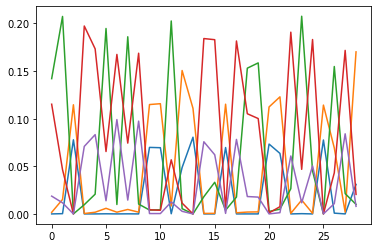

In [11]:
plt.plot(ds.vsno01.isel(ni=2))
plt.plot(ds.vsno02.isel(ni=2))
plt.plot(ds.vsno03.isel(ni=2))
plt.plot(ds.vsno04.isel(ni=2))
plt.plot(ds.vsno05.isel(ni=2))

In [5]:
import matplotlib.pyplot as plt